In [1]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score


data = pd.read_csv("./data/whole_data.csv")
data = data.iloc[:, 1:]
data.head()

C:\Users\green198800\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\green198800\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,Action,Time,Event
0,0.62,0.03,0.10,0.28,0.43,0.67,0.38,0.12,0.15,0.88,0.72,0.89,0.43,0.36,0.43,0.66,0.16,0,0.47,1
1,0.12,0.87,0.43,0.28,0.02,0.23,0.82,0.14,0.81,0.68,0.53,0.24,0.05,0.01,0.96,0.98,0.34,0,1.39,1
2,0.37,0.06,0.47,0.86,0.86,0.33,0.01,0.90,0.79,0.43,0.64,0.84,0.05,0.56,0.01,0.77,0.62,0,3.61,1
3,0.57,0.39,0.65,0.76,0.83,0.92,0.57,0.60,0.34,0.35,0.44,0.93,0.44,0.65,0.61,0.25,0.96,0,1.02,1
4,0.82,0.00,0.26,0.27,0.82,0.68,0.43,0.92,0.81,0.26,0.66,0.04,0.10,0.93,0.82,0.37,0.09,1,2.07,1


In [11]:
X = data.iloc[:, :18]
y = data.iloc[:, 18]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

X_train = X_train.to_numpy()
X_val   = X_val.to_numpy()

y_train = y_train.to_numpy().reshape(-1, 1)
y_val   = y_val.to_numpy().reshape(-1, 1)

In [14]:
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor

regressor = TabNetRegressor(n_d=30,
                            n_a=30,
                            n_steps=10)

regressor.fit(X_train, y_train, X_val, y_val, patience=40)
pred = regressor.predict(X_val)

Device used : cpu
Will train until validation stopping metric hasn't improved in 40 rounds.
---------------------------------------
| EPOCH |  train  |   valid  | total time (s)
| 1     | -240.57838 |  -868.98083 |   0.4       
| 2     | -215.02982 |  -843.49866 |   1.0       
| 3     | -207.96687 |  -838.91394 |   1.4       
| 4     | -204.03642 |  -832.03748 |   1.8       
| 5     | -202.52695 |  -832.48761 |   2.3       
| 6     | -188.24692 |  -832.92255 |   2.7       
| 7     | -195.97917 |  -835.25159 |   3.1       
| 8     | -190.61700 |  -819.46716 |   3.5       
| 9     | -190.81271 |  -831.35583 |   3.9       
| 10    | -191.09064 |  -830.62891 |   4.3       
| 11    | -193.22797 |  -828.92572 |   4.7       
| 12    | -195.42769 |  -834.37378 |   5.1       
| 13    | -191.57423 |  -833.74060 |   5.4       
| 14    | -187.23088 |  -836.76630 |   5.8       
| 15    | -183.38062 |  -838.41968 |   6.3       
| 16    | -188.74048 |  -812.49823 |   6.7       
| 17    | -182.21815 |

In [15]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, pred.round(0))

758.1333641791048

In [68]:
test_data = pd.read_csv('./data/testX.csv')
test_data = test_data.iloc[:, 1:]

pred = clf.predict(test_data.to_numpy())

In [69]:
result = pd.DataFrame(zip(list(range(287)), map(int, pred.tolist())), columns=['Title', 'action'])
result.to_csv('./result/tabnet_result.csv', index=False)
result

,Title,action
0,0,0
1,1,0
2,2,0
3,3,0
4,4,1
...,...,...
281,281,1
282,282,0
283,283,0
284,284,0


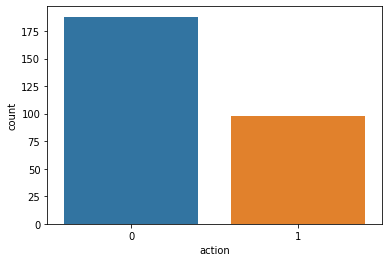

In [70]:
import seaborn as sns

sns.countplot(result.action)

In [77]:
np.sum(result.action == 1) / len(result.action) * 100

34.26573426573427

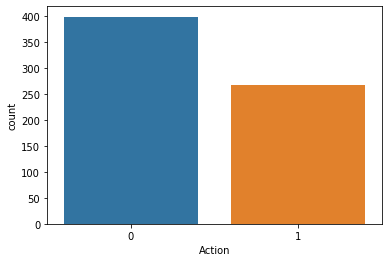

In [72]:
sns.countplot(data.Action)

In [76]:
import numpy as np

np.sum(data.Action == 1) / len(data.Action) * 100

40.090090090090094